"""
What This Code Does:
Loads real housing data for California.

Splits the data into training and test sets.

Scales the features and target (important for SVR!).

Trains an SVR model using an RBF kernel.

Predicts house prices on the test set.

Evaluates performance using MSE and R² score.

Plots the actual vs predicted values
"""

"""
Explanation:

fetch_california_housing: Loads the California housing dataset.

SVR: Support Vector Regression model.

train_test_split: Splits data into training and test sets.

StandardScaler: Standardizes features (mean=0, std=1) — important for SVR.

mean_squared_error, r2_score: Evaluation metrics.

matplotlib.pyplot: For plotting graphs.

"""

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
"""
Loads the housing dataset.

X contains features (e.g., number of rooms, population).

y contains target values (median house prices in $100,000s).
"""
data = fetch_california_housing()
X = data.data
y = data.target


In [3]:
# Step 2: Train-test split
"""
Explanation:

Splits 80% of the data for training and 20% for testing.

random_state=42 ensures reproducibility.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Feature scaling (important for SVR)
"""
Explanation:

SVR is sensitive to the scale of data → scaling is essential.

StandardScaler: Scales data to have zero mean and unit variance.

reshape(-1, 1): Converts y_train into 2D shape (needed for fit_transform).

.ravel(): Flattens the scaled target back to 1D array (required by SVR)
"""
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [5]:
# Step 4: Train the SVR model
"""
Explanation:

SVR is sensitive to the scale of data → scaling is essential.

StandardScaler: Scales data to have zero mean and unit variance.

reshape(-1, 1): Converts y_train into 2D shape (needed for fit_transform).

.ravel(): Flattens the scaled target back to 1D array (required by SVR)
"""
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=100)

In [6]:
# Step 5: Make predictions
"""
Explanation:

predict(...): Predicts house prices using the test data.

Since SVR output was scaled, we inverse-transform it back to original scale using scaler_y.
"""
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

Mean Squared Error: 0.32
R² Score: 0.76


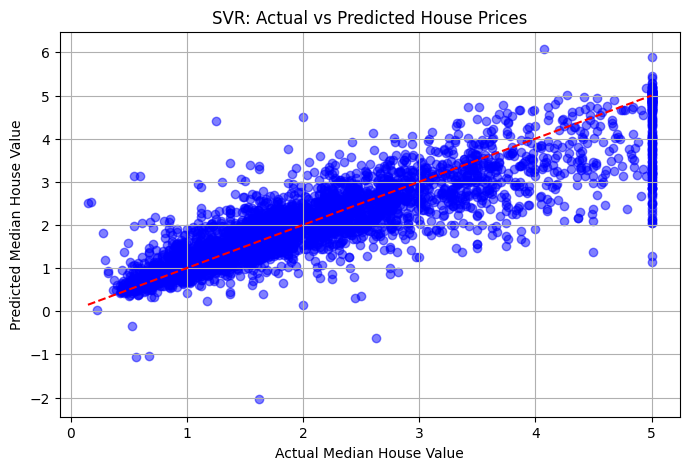

In [7]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Plot predicted vs actual
"""
Explanation:

mean_squared_error: Measures average squared difference between actual and predicted values.

r2_score: Shows how well predictions approximate actual values.

R² = 1 → perfect prediction.

R² = 0 → model is no better than mean prediction.
"""
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("SVR: Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

"""
| Part            | Purpose                                   |
| --------------- | ----------------------------------------- |
| Data loading    | Load California housing dataset           |
| Data splitting  | Train-test division                       |
| Feature scaling | Normalize features and target for SVR     |
| SVR model       | Fit using RBF kernel and tuned parameters |
| Evaluation      | Use MSE and R² to check performance       |
| Visualization   | Plot predictions vs actuals               |

"""